<a href="https://colab.research.google.com/github/Shyamsundarkanaka/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/Data science/Module 1/Hotel booking analysis/'

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Importing Data and going through it to undertand it


In [4]:
df = pd.read_csv(path+ 'Hotel Bookings.csv')

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.shape

(119390, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [9]:
df.customer_type.value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [10]:
print(df.columns[df.isna().any()].to_list)

<bound method IndexOpsMixin.tolist of Index(['children', 'country', 'agent', 'company'], dtype='object')>


In [11]:
df.columns[df.isna().any()]

Index(['children', 'country', 'agent', 'company'], dtype='object')

In [12]:
df[['children', 'country', 'agent', 'company']].isnull().sum(axis = 0)

children         4
country        488
agent        16340
company     112593
dtype: int64

In [13]:
'''
print(df.children.value_counts())
print(df.country.value_counts())
print(df.agent.value_counts())
print(df.company.value_counts())
'''


'\nprint(df.children.value_counts())\nprint(df.country.value_counts())\nprint(df.agent.value_counts())\nprint(df.company.value_counts())\n'

In [14]:
df.columns.to_list()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [15]:
print(df.children.value_counts())

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64


#Data Cleansing

In [16]:
#Drop the company column as there too many missing values
df = df.drop(['company'], axis=1)

In [17]:
df.shape

(119390, 31)

In [18]:
# Replace Null Values with Mode for childen column
df['children'].fillna(df.children.mode()[0], inplace=True)

In [19]:
df['children'].isnull().sum()

0

In [20]:
df.columns[df.isna().any()]

Index(['country', 'agent'], dtype='object')

In [21]:
# Replace Null Values with Mode for country column
df.country.fillna(df.country.mode()[0], inplace=True)

In [22]:
df.columns[df.isna().any()]

Index(['agent'], dtype='object')

In [23]:
df.agent.value_counts().sort_values()


337.0        1
90.0         1
285.0        1
497.0        1
397.0        1
         ...  
7.0       3539
14.0      3640
1.0       7191
240.0    13922
9.0      31961
Name: agent, Length: 333, dtype: int64

In [24]:
#Replace Null value of agent column with  0
df.agent.fillna(0, inplace=True)

In [25]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [26]:
df.head(2
        )

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01


#Exploration

In [27]:
import datetime

In [61]:
df['date'] = df.apply(lambda row: datetime.datetime.strptime(str(row['arrival_date_year'])+'-'+row['arrival_date_month']+'-'+str(row['arrival_date_day_of_month']), '%Y-%B-%d'),axis=1)

75166
44224
              counts  percentage
Not_canceled   75166       62.96
canceled       44224       37.04


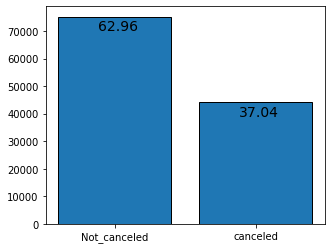

In [63]:
df2 =  pd.DataFrame(enumerate(df.is_canceled.value_counts()),index=['Not_canceled','canceled'],columns=['values','counts'])
#print(df2)
def percentage(val):
  print(val)
  return round((val*100)/df2['counts'].sum(),2)

df2['percentage'] = df2.apply(lambda x: percentage(x[1]),axis=1 )
df2 = df2.drop('values',axis=1)
print(df2)
plt.figure(figsize=(5,4)) # does not affect the following plot
plt.bar(list(df2.index),list(df2['counts']),0.8,ec='black')



,index,values,counts
0,Not_canceled,0,75166
1,canceled,1,44224


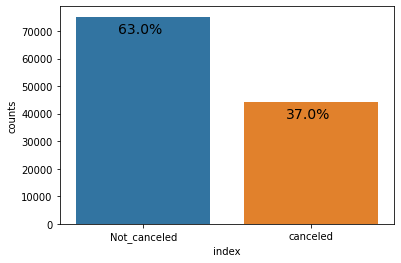

In [107]:
df2 =  pd.DataFrame(enumerate(df.is_canceled.value_counts()),index=['Not_canceled','canceled'],columns=['values','counts']).reset_index()
df2
counts = df2.counts.to_list()
def percent(x):
  return round(100*(x/sum(counts)),1)
sns.barplot(x='index',y='counts',data=df2)
for i in range(0,2):
  plt.text(i-0.15,counts[i]-6000,str(percent(counts[i]))+'%',fontsize=14)
df2

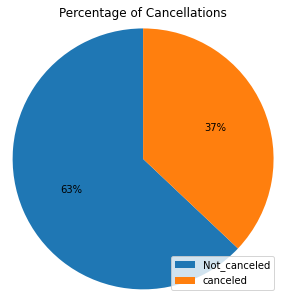

In [149]:
plt.figure(figsize=(5,5))
plt.pie(df2.counts,radius=1.2,autopct='%1.0f%%',startangle=90,labeldistance=0.28)#labels = df2['index'],
plt.title('Percentage of Cancellations')
plt.legend(labels=df2['index'],loc='lower right')

plt.show()

###We noticed that 37% of the total bookings got canceled.

## 1.Type of hotel

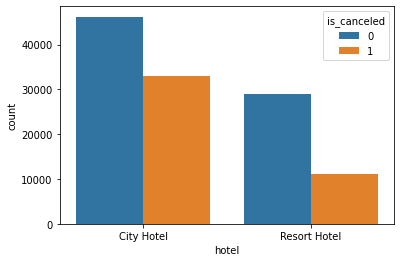

In [30]:
df2 = pd.DataFrame(df.groupby('hotel')['is_canceled'].value_counts())
df2 = df2.rename(columns={"is_canceled": "count"})
df2 = df2.reset_index()
df2
sns.barplot(x='hotel',y='count',hue='is_canceled',data=df2)

##2.How does customer type effect cancellations?


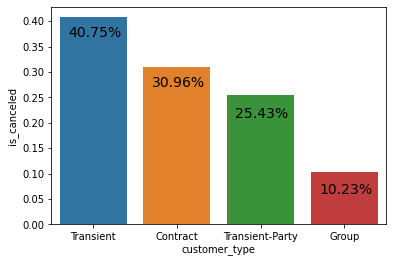

In [31]:
sns.barplot(y='is_canceled',x='customer_type', data=df, ci=None)#, hue='is_canceled')
percentage = df.groupby('customer_type')['is_canceled'].mean().to_list()
percentage = sorted(percentage,reverse=True)
for i in range(0,4):
  plt.text(i-0.3,round(percentage[i],2)-0.04,str(round(percentage[i]*100,2))+'%',fontsize=14)

In [32]:
df2 = pd.DataFrame(df.groupby('customer_type')['is_canceled'].value_counts())
df2 = df2.rename(columns={"is_canceled": "count"})
df2 = df2.reset_index()


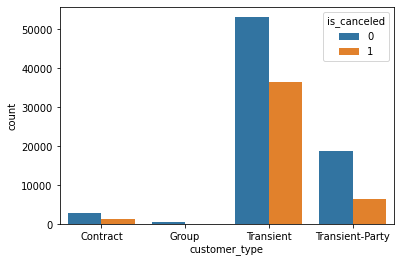

In [33]:
sns.barplot(x='customer_type',y='count',hue='is_canceled',data=df2)


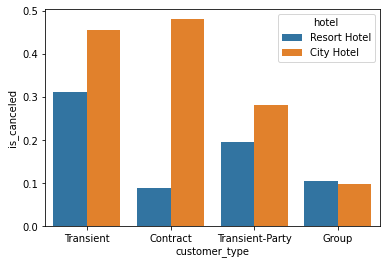

In [34]:
sns.barplot(y='is_canceled',x='customer_type', data=df, hue='hotel', ci=None)
#sns.barplot(y='is_canceled',x='customer_type', data=df, hue='hotel', ci=None)

##3.Variation of tendancy to cancellation over the months of the year.

In [35]:
def compliment(a):
  if a == 0:
    return 1
  else :
    return 0
df['is_not_canceled'] = df.is_canceled.apply(lambda x: compliment(x))

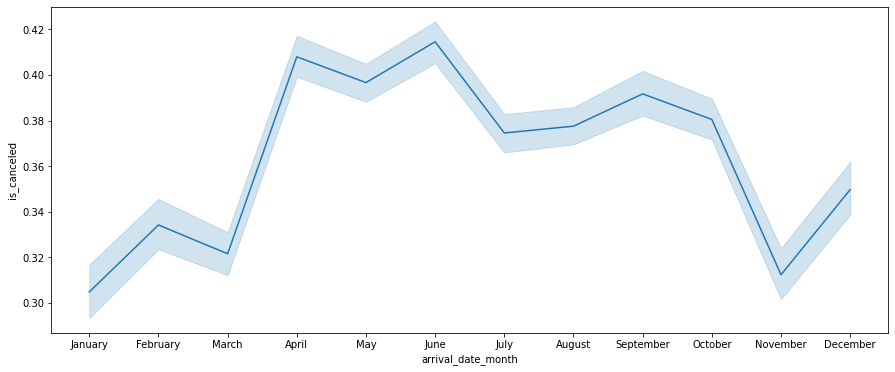

In [36]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=months, ordered=True)

plt.figure(figsize=(15,6)) # does not affect the following plot
#fig, ax = plt.subplots()
sns.lineplot(x='arrival_date_month', y='is_canceled', data=df)

In [37]:
df.arrival_date_year.value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [38]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date,is_not_canceled
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,1


## 4.Does the change no of booking changes affect the cancellation?

In [39]:
df.booking_changes.value_counts()[:10]

0    101314
1     12701
2      3805
3       927
4       376
5       118
6        63
7        31
8        17
9         8
Name: booking_changes, dtype: int64

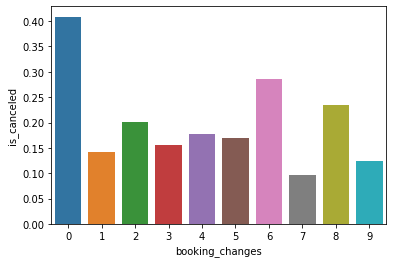

"\npercentage = df.groupby('booking_changes')['is_canceled'].mean().to_list()\nfor i in range(0,10):\n  plt.text(i-0.2,round(percentage[i],2),str(round(percentage[i]*100,2))+'%',fontsize=14)"

In [40]:
sns.barplot(x='booking_changes',y='is_canceled',data=df,order=pd.value_counts(df['booking_changes']).iloc[:10].index, ci=None)
plt.show()
'''
percentage = df.groupby('booking_changes')['is_canceled'].mean().to_list()
for i in range(0,10):
  plt.text(i-0.2,round(percentage[i],2),str(round(percentage[i]*100,2))+'%',fontsize=14)'''

In [41]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date,is_not_canceled
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,1


##5.If the assigned room is not same as reserved room?

In [42]:
df['same_room_assigned'] = np.where(df.reserved_room_type==df.assigned_room_type, 1 , 0)
#df['col3'] = np.where(df['age'] <= 9, 'child', df['sex'])


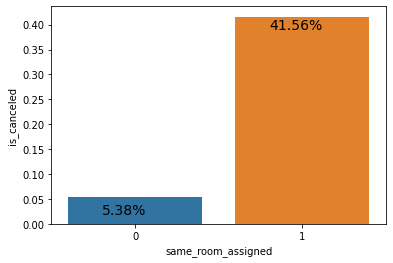

In [43]:
sns.barplot(x='same_room_assigned', y = 'is_canceled', data=df, ci=None)
percentage = df.groupby('same_room_assigned')['is_canceled'].mean().to_list()
for i in range(0,2):
  plt.text(i-0.2,round(percentage[i],2)-0.03,str(round(percentage[i]*100,2))+'%',fontsize=14)

## 6.Cancellation rate based on deposit type 

In [44]:
df.deposit_type.value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

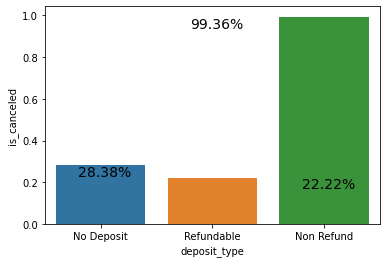

In [45]:
sns.barplot(x='deposit_type', y = 'is_canceled', data=df, ci=None)
percentage = df.groupby('deposit_type')['is_canceled'].mean().to_list()
for i in range(0,3):
  plt.text(i-0.2,round(percentage[i],2)-0.05,str(round(percentage[i]*100,2))+'%',fontsize=14)

In [46]:
df.groupby('deposit_type')['is_canceled'].value_counts()


deposit_type  is_canceled
No Deposit    0              74947
              1              29694
Non Refund    1              14494
              0                 93
Refundable    0                126
              1                 36
Name: is_canceled, dtype: int64

## 7.Variation in of cancellation based on market segment.

In [47]:
#df7 = df[df.market_segment!='Undefined']
df7 = df.drop(df.loc[df['market_segment']=='Undefined'].index,)
print(df.shape,df7.shape)

(119390, 34) (119388, 34)


In [48]:
market_segment_df = df7['market_segment'].value_counts().reset_index().rename(columns={'index':'market_segment', 'market_segment': 'count'})
market_segment_df = market_segment_df.head(7)
market_segment_df

,market_segment,count
0,Online TA,56477
1,Offline TA/TO,24219
2,Groups,19811
3,Direct,12606
4,Corporate,5295
5,Complementary,743
6,Aviation,237


In [49]:
# extracting number of customer type
market_segment_values = market_segment_df['count'].values
market_segment_values

array([56477, 24219, 19811, 12606,  5295,   743,   237])

In [50]:
# extracting customer type for labelling 
market_segment_labels = market_segment_df['market_segment'].values
market_segment_labels

array(['Online TA', 'Offline TA/TO', 'Groups', 'Direct', 'Corporate',
       'Complementary', 'Aviation'], dtype=object)

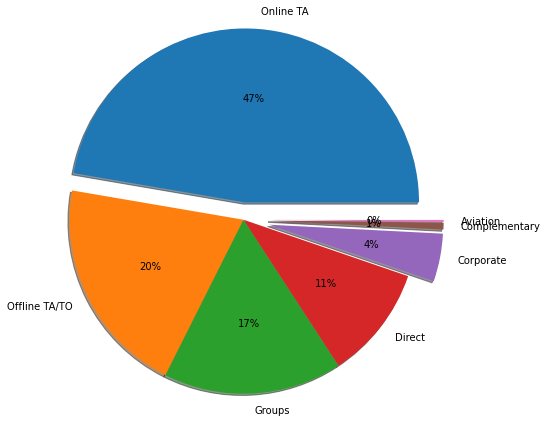

In [51]:
#Ploting pie plot
myexplode = [0.2, 0, 0, 0,0.3,0.3,0.3]
plt.pie(market_segment_values, labels = market_segment_labels,radius = 2,autopct='%1.0f%%', explode=myexplode, shadow = True)
plt.show() 

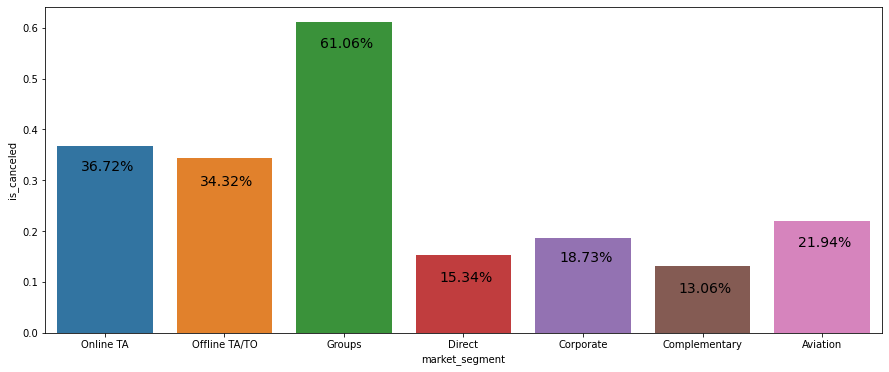

In [52]:
List = ['Online TA', 'Offline TA/TO', 'Groups', 'Direct', 'Corporate','Complementary', 'Aviation']
df['market_segment'] = pd.Categorical(df['market_segment'], categories=List, ordered=True)
plt.figure(figsize=(15,6))
sns.barplot(x='market_segment', y = 'is_canceled', data=df, ci=None)
percentage = df.groupby('market_segment')['is_canceled'].mean().to_list()
for i in range(0,7):
  plt.text(i-0.2,round(percentage[i],2)-0.05,str(round(percentage[i]*100,2))+'%',fontsize=14)


## 8.How often does the repeated guest cancel the booking

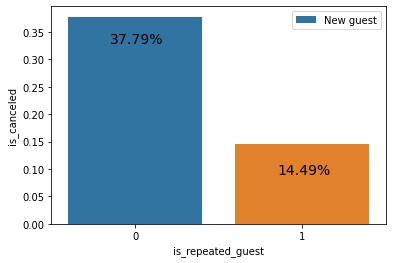

In [53]:
sns.barplot(x='is_repeated_guest', y = 'is_canceled', data=df, ci=None)
plt.legend(['New guest','Repeated Guest'])
percentage = df.groupby('is_repeated_guest')['is_canceled'].mean().to_list()
for i in range(0,2):
  plt.text(i-0.15,round(percentage[i],2)-0.05,str(round(percentage[i]*100,2))+'%',fontsize=14)

plt.show()


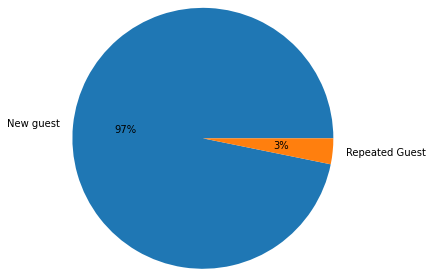

In [54]:
is_repeated = df.is_repeated_guest.value_counts().tolist()
plt.pie(is_repeated, labels=['New guest','Repeated Guest'], radius=1.5, autopct='%1.0f%%')
plt.show()

## 9.Does special request decrease the cancellation rate?

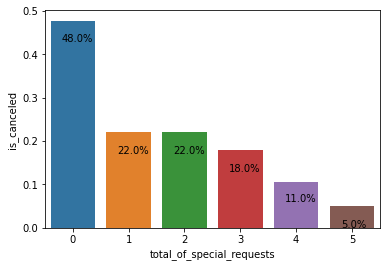

In [55]:
sns.barplot(x='total_of_special_requests', y = 'is_canceled', data=df, ci=None)
percentage = df.groupby('total_of_special_requests')['is_canceled'].mean().to_list()
for i in range(0,6):
  plt.text(i-0.2,round(percentage[i],2)-0.05,str(round(percentage[i],2)*100)+'%',fontsize=10)
plt.show()


## 10.Which type of meal type bookings have highest number of bookings.

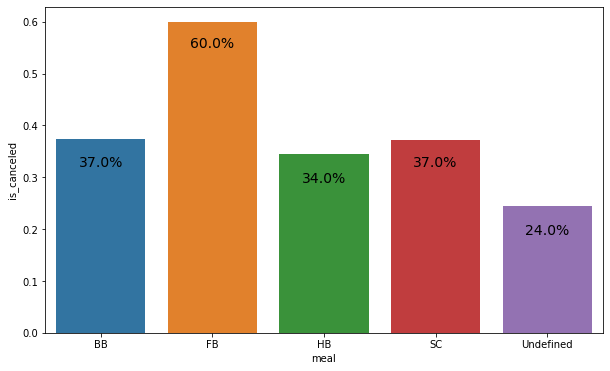

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(x='meal', y = 'is_canceled', data=df, ci=None)
percentage = df.groupby('meal')['is_canceled'].mean().to_list()
for i in range(0,5):
  plt.text(i-0.2,round(percentage[i],2)-0.05,str(round(percentage[i],2)*100)+'%',fontsize=14)